# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [63]:
# If on colab, uncomment the following lines

# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [65]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,808,83,46,68,139,59,6,150,44,19,146,172,336,183,74,5,3,185,191
1,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
2,44,119,54,106,220,65,12,213,31,24,167,223,675,232,66,20,1,192,202
3,256,91,36,77,157,56,7,155,42,19,126,177,361,123,65,8,15,195,201
4,628,98,51,84,207,72,7,184,35,21,161,199,520,198,72,9,11,196,199
5,820,87,38,71,123,53,8,137,49,18,127,158,277,145,75,0,9,181,186
6,433,85,42,70,130,56,7,150,45,19,145,177,328,172,82,10,14,181,185
7,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202
8,458,103,57,105,221,69,11,218,30,24,173,226,706,250,73,10,2,187,195
9,439,98,47,109,202,59,11,199,34,23,154,207,586,165,61,1,33,194,208


Methods `describe` and `info` deliver some useful information.

In [66]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,406.347905,93.803279,44.846995,82.045537,169.063752,61.79235,8.695811,168.828780,41.038251,20.579235,148.012750,188.857923,440.207650,174.513661,72.828780,6.411658,12.449909,188.726776,195.420765
std,243.180960,8.423199,6.274608,16.223342,35.156189,8.62270,5.027334,33.809306,7.972603,2.639469,14.675002,32.214578,179.865817,33.267363,8.124702,5.149758,8.805675,6.171369,7.610476
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.00000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,196.000000,87.000000,40.000000,70.000000,140.000000,57.00000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,316.000000,148.000000,67.000000,2.000000,6.000000,184.000000,189.000000
50%,402.000000,93.000000,44.000000,80.000000,168.000000,61.00000,8.000000,156.000000,43.000000,19.000000,146.000000,178.000000,362.000000,173.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,612.000000,100.000000,50.000000,98.000000,197.000000,65.00000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,602.000000,198.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.00000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [67]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [68]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Initialize StandardScaler for feature standardization 
# and OrdinalEncoder for target encoding
standartiser = StandardScaler()
encoder = OrdinalEncoder()

# Standardize the X data
X_train_std = standartiser.fit_transform(X_train_pd)
X_test_std = standartiser.transform(X_test)

# Encode the y data
y_train_enc = encoder.fit_transform(y_train[:, np.newaxis])[:, 0]
y_test_enc = encoder.transform(y_test[:, np.newaxis])[:, 0]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

F1 score: 0.7604
Accuracy: 0.7609


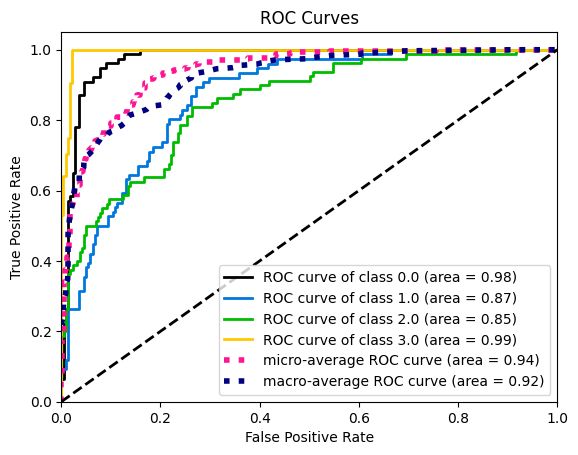

In [69]:
### YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc

import warnings
warnings.filterwarnings('ignore')

# Define the logistic regression model with specified hyperparameters
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
    'class_weight': ['balanced', None],
}

# Perform RandomizedSearchCV with cross-validation
rs = RandomizedSearchCV(log_reg, param_distributions=param_grid, cv=3, scoring='f1_macro')
rs.fit(X_train_std, y_train_enc)

# Use the best estimator from RandomizedSearchCV
best_log_reg = rs.best_estimator_
best_log_reg_params = rs.best_params_

# Evaluate the model
y_pred = best_log_reg.predict(X_test_std)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_log_reg.predict_proba(X_test_std)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

In [70]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

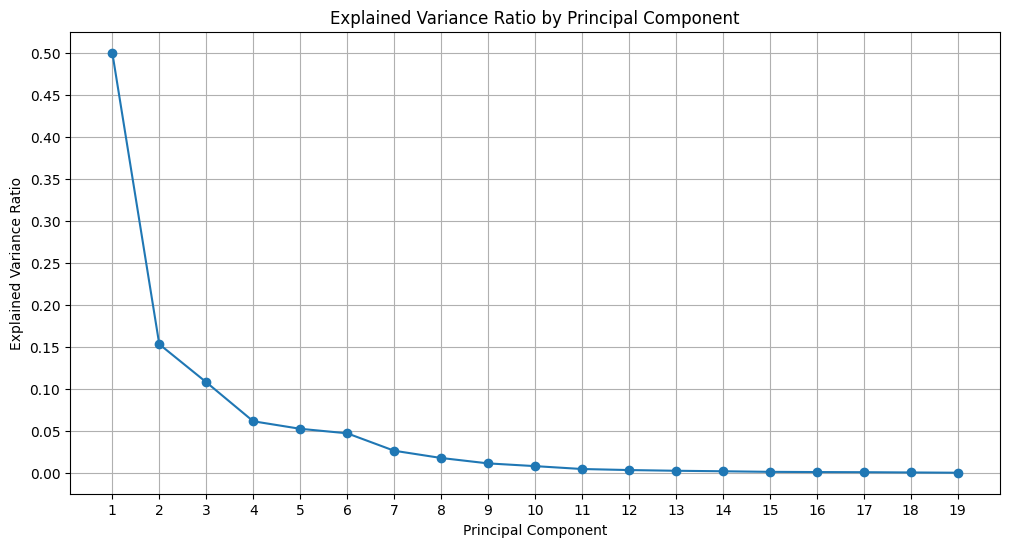

In [71]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the training data
pca = PCA()
pca.fit(X_train_std)

# Calculate the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
fig, axes = plt.subplots(figsize=(12, 6))
axes.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
axes.set_xlabel('Principal Component')
axes.set_ylabel('Explained Variance Ratio')
axes.set_title('Explained Variance Ratio by Principal Component')
axes.set_xticks(range(1, len(explained_var_ratio) + 1))
axes.set_yticks([0 + 0.05*i for i in range(11)])
axes.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [72]:
### YOUR CODE HERE

# Data is already normalized
# It means that previous plot can be used to select optimal numper of componens

def get_optimal_components(explained_var_ratio: np.ndarray, 
                           explained_var_perc: float=0.95) -> int:
    
    total_explained_var = 0
    n = 0
    
    while total_explained_var < explained_var_perc:
        total_explained_var += explained_var_ratio[n]
        n += 1
        
    return n
    

# Transform the train and test data with the chosen number of components
n_components = get_optimal_components(explained_var_ratio)

print(f"Got optimal explained variance ration with {n_components} components")

pca = PCA(n_components)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

Got optimal explained variance ration with 8 components


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

F1 score: 0.5996
Accuracy: 0.6094


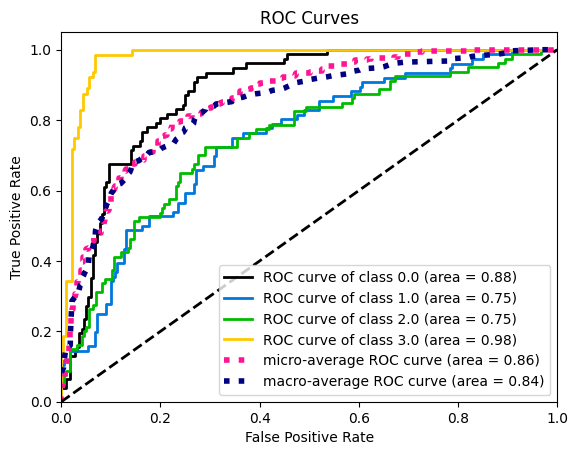

In [73]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model with specified hyperparameters
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500]
}

# Perform RandomizedSearchCV with cross-validation
gs = GridSearchCV(log_reg, param_grid=param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from RandomizedSearchCV
best_log_reg = gs.best_estimator_
best_lr_params = gs.best_params_

# Evaluate the model
y_pred = best_log_reg.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_log_reg.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

F1 score: 0.6318
Accuracy: 0.6263


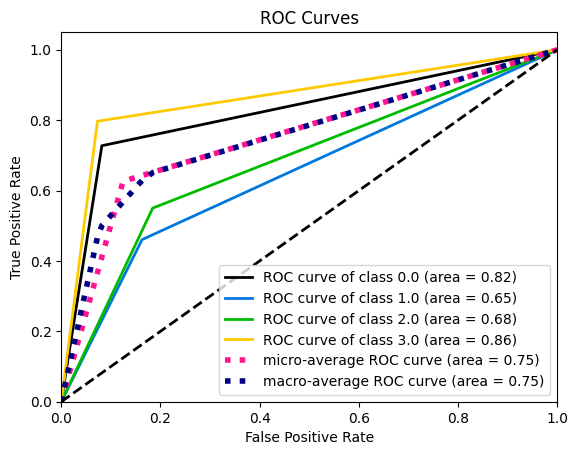

In [74]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

# Define the hyperparameter grid for max_depth
param_grid = {'max_depth': [3, 5, 7, 10, 15]}

# Perform GridSearchCV with cross-validation
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from GridSearchCV
best_dt = gs.best_estimator_
best_dt_params = gs.best_params_

# Evaluate the model
y_pred = best_dt.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_dt.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

F1 score: 0.6834
Accuracy: 0.6801


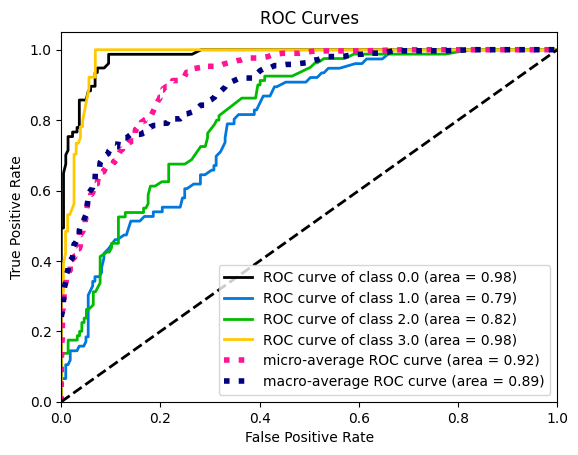

In [75]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

# Define the hyperparameter grid for max_depth
param_grid = {
    'estimator': [best_log_reg, best_dt],
    'n_estimators': range(2, 101, 5),
}

# Perform GridSearchCV with cross-validation
gs = GridSearchCV(BaggingClassifier(), param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from GridSearchCV
best_bagging = gs.best_estimator_
best_bagging_params = gs.best_params_

# Evaluate the model
y_pred = best_bagging.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_bagging.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

In [76]:
ensemble_sizes = np.arange(2, 101, 5)

# Initialize a Bagging ensemble of logistic regressions
bagging_lr_f1_scores = []
bagging_lr_accuracy_scores = []

for n in ensemble_sizes:
    bagging_lr = BaggingClassifier(base_estimator=best_log_reg, n_estimators=n, random_state=42)
    bagging_lr.fit(X_train_pca, y_train_enc)
    y_pred_bagging_lr = bagging_lr.predict(X_test_pca)
    f1_bagging_lr = f1_score(y_test_enc, y_pred_bagging_lr, average='macro')
    accuracy_bagging_lr = accuracy_score(y_test_enc, y_pred_bagging_lr)
    bagging_lr_f1_scores.append(f1_bagging_lr)
    bagging_lr_accuracy_scores.append(accuracy_bagging_lr)

In [77]:
# Initialize a Bagging ensemble of decision trees
bagging_dt_f1_scores = []
bagging_dt_accuracy_scores = []

for n in ensemble_sizes:
    bagging_dt = BaggingClassifier(base_estimator=best_dt, n_estimators=n, random_state=42)
    bagging_dt.fit(X_train_pca, y_train_enc)
    y_pred_bagging_dt = bagging_dt.predict(X_test_pca)
    f1_bagging_dt = f1_score(y_test_enc, y_pred_bagging_dt, average='macro')
    accuracy_bagging_dt = accuracy_score(y_test_enc, y_pred_bagging_dt)
    bagging_dt_f1_scores.append(f1_bagging_dt)
    bagging_dt_accuracy_scores.append(accuracy_bagging_dt)

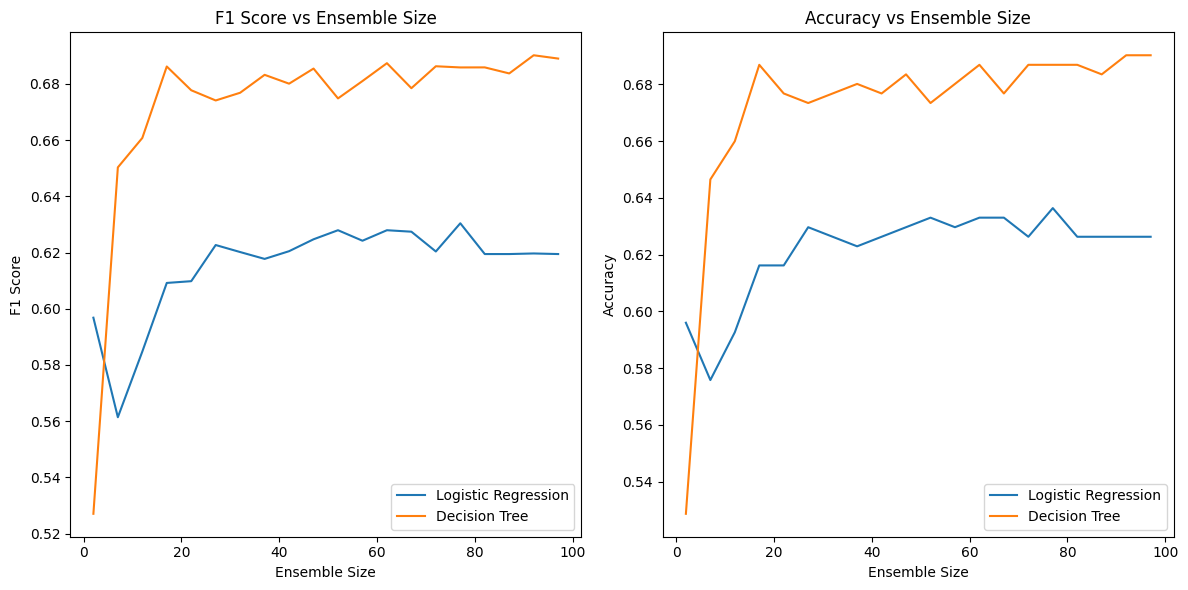

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, bagging_lr_f1_scores, label='Logistic Regression')
plt.plot(ensemble_sizes, bagging_dt_f1_scores, label='Decision Tree')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score vs Ensemble Size')

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, bagging_lr_accuracy_scores, label='Logistic Regression')
plt.plot(ensemble_sizes, bagging_dt_accuracy_scores, label='Decision Tree')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Ensemble Size')

plt.tight_layout()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

F1 score: 0.6873
Accuracy: 0.6902


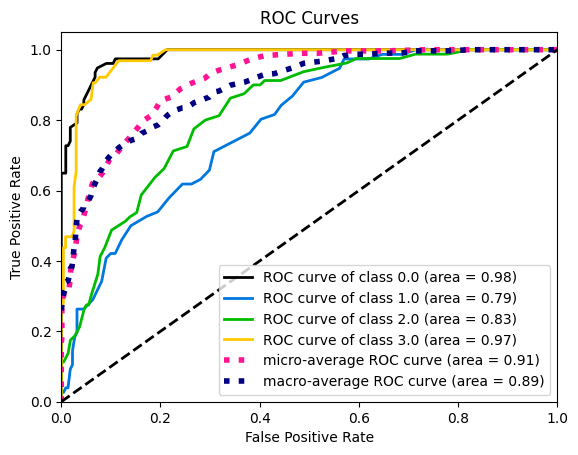

In [79]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

param_grid = {
    'n_estimators': range(2, 101, 5),
}

# Perform GridSearchCV with cross-validation
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from GridSearchCV
best_rf = gs.best_estimator_
best_rf_params = gs.best_params_

# Evaluate the model
y_pred = best_rf.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_rf.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

In [80]:
# Initialize lists to store F1 scores and accuracy
rf_f1_scores = []
rf_accuracy_scores = []

# Define the range of number of trees
n_trees_range = range(1, 101, 5)

for n_trees in n_trees_range:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train_pca, y_train_enc)
    y_pred_rf = rf.predict(X_test_pca)
    f1_rf = f1_score(y_test_enc, y_pred_rf, average='macro')
    accuracy_rf = accuracy_score(y_test_enc, y_pred_rf)
    rf_f1_scores.append(f1_rf)
    rf_accuracy_scores.append(accuracy_rf)

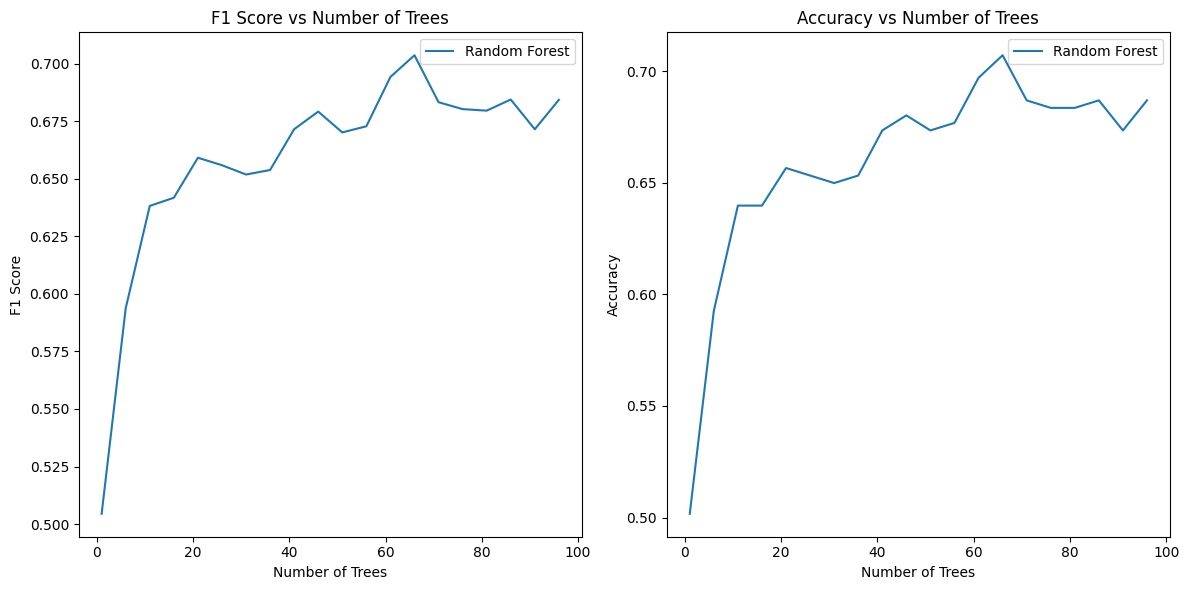

In [81]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_trees_range, rf_f1_scores, label='Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score vs Number of Trees')

plt.subplot(1, 2, 2)
plt.plot(n_trees_range, rf_accuracy_scores, label='Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Number of Trees')

plt.tight_layout()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [86]:
# YOUR CODE HERE

# Split the training data into 10 equal parts
num_parts = 10
train_sizes = np.arange(1, num_parts + 1)
accuracies = {'Logistic Regression': [], 'Decision Tree': [], 'Random Forest': []}
f1_scores = {'Logistic Regression': [], 'Decision Tree': [], 'Random Forest': []}

# n_samples = len(X_train_pca)
# random_inds = np.random.choice(n_samples, n_samples, replace=False)
# X_train_pca = X_train_pca[random_inds]
# y_train_enc = y_train_enc[random_inds]

for size in train_sizes:
    # Combine the first size parts for training
    
    X_train_combined = np.concatenate([X_part[:size] for X_part in np.array_split(X_train_pca, 10)])
    y_train_combined = np.concatenate([y_part[:size] for y_part in np.array_split(y_train_enc, 10)])

    # Train models
    log_reg = LogisticRegression(**best_lr_params)  # Add optimal hyperparameters
    log_reg.fit(X_train_combined, y_train_combined)
    dt = DecisionTreeClassifier(**best_dt_params)  # Add optimal hyperparameters
    dt.fit(X_train_combined, y_train_combined)
    rf = RandomForestClassifier(**best_rf_params)  # Add optimal hyperparameters
    rf.fit(X_train_combined, y_train_combined)

    # Predict on test set
    y_pred_log_reg = log_reg.predict(X_test_pca)
    y_pred_dt = dt.predict(X_test_pca)
    y_pred_rf = rf.predict(X_test_pca)

    # Calculate accuracy and f1 scores
    accuracies['Logistic Regression'].append(accuracy_score(y_test_enc, y_pred_log_reg))
    accuracies['Decision Tree'].append(accuracy_score(y_test_enc, y_pred_dt))
    accuracies['Random Forest'].append(accuracy_score(y_test_enc, y_pred_rf))

    f1_scores['Logistic Regression'].append(f1_score(y_test_enc, y_pred_log_reg, average='macro'))
    f1_scores['Decision Tree'].append(f1_score(y_test_enc, y_pred_dt, average='macro'))
    f1_scores['Random Forest'].append(f1_score(y_test_enc, y_pred_rf, average='macro'))

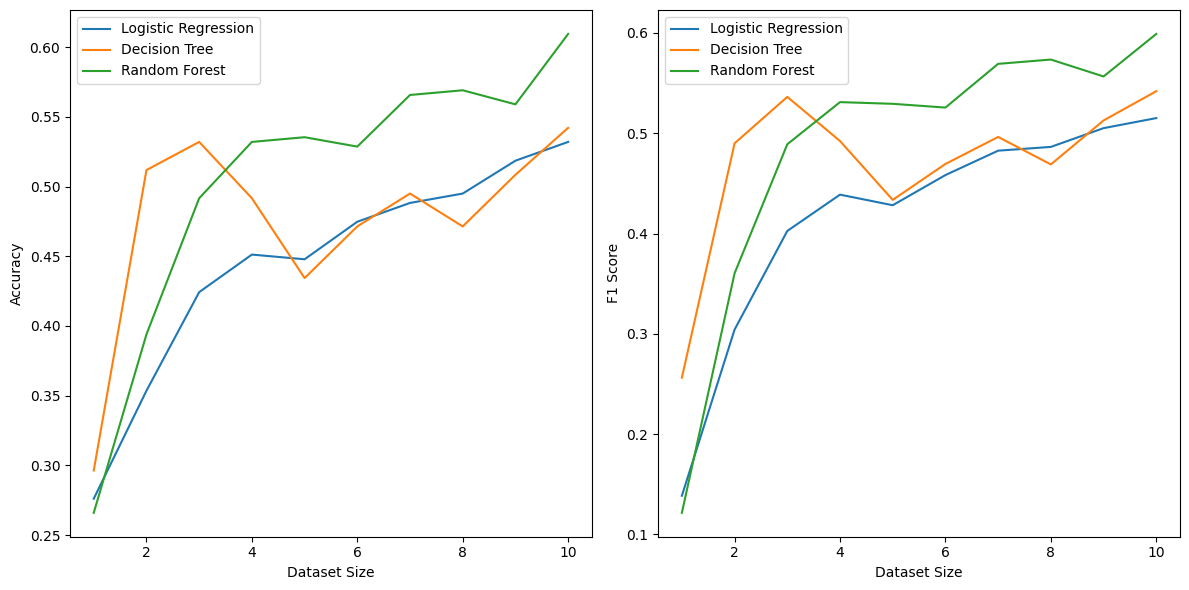

In [87]:
# Build a plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, accuracies['Logistic Regression'], label='Logistic Regression')
plt.plot(train_sizes, accuracies['Decision Tree'], label='Decision Tree')
plt.plot(train_sizes, accuracies['Random Forest'], label='Random Forest')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, f1_scores['Logistic Regression'], label='Logistic Regression')
plt.plot(train_sizes, f1_scores['Decision Tree'], label='Decision Tree')
plt.plot(train_sizes, f1_scores['Random Forest'], label='Random Forest')
plt.xlabel('Dataset Size')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()